In [222]:
import urllib
import re
import urllib.parse 
import urllib.request
from googlesearch import search
import requests 
from bs4 import BeautifulSoup 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [295]:
organism = "plant" #must be replaced by input()

In [296]:
flag = input(" If you want results faster, tap [f], \n else if you want more genome projects, type [m] \n \n")

 If you want results faster, tap [f], 
 else if you want more genome projects, type [m] 
 
m


In [297]:
query = "genome progect" #constant

In [298]:
encoded = urllib.parse.quote(query)

In [299]:
urls = []
for i in search(organism+query, tld="com", lang='en', num=10000000000000000000, stop=10000000000, pause=2):
    urls.append(i)

In [300]:
urls

['https://en.wikipedia.org/wiki/1000_Plant_Genomes_Project',
 'https://en.wikipedia.org/wiki/1000_Plant_Genomes_Project#Goals_of_the_Project',
 'https://en.wikipedia.org/wiki/1000_Plant_Genomes_Project#Project_Approach',
 'https://en.wikipedia.org/wiki/1000_Plant_Genomes_Project#Relationships_to_the_1000_Genomes_Project',
 'https://www.researchgate.net/publication/319853325_Plant_Genome_Projects',
 'https://www.arabidopsis.org/portals/genAnnotation/other_genomes/index.jsp',
 'https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470015902.a0002018.pub2',
 'http://www.pnas.org/content/95/5/2017',
 'https://www.nsf.gov/od/lpa/nsf50/nsfoutreach/htm/n50_z2/pages_z3/05_pg.htm',
 'https://db.cngb.org/10kp/',
 'https://www.slideshare.net/QaisarKhan32/plant-genome-project-by-haider-ali-cobam-uop-peshawar',
 'http://www.biologydiscussion.com/genetics/plant-genome-project/plant-genome-project-genetics/61411',
 'https://gnpn-genome.org/plants',
 'https://academic.oup.com/gigascience/article/8/3/giy

In [301]:
good_outputs = []
if flag == 'm':
    for URL in urls:
        try:
            r = requests.get(URL) 
        except requests.exceptions.RequestException:
            continue

        soup = BeautifulSoup(r.content, 'html5lib') 
        links = soup.find_all('a')
        if URL.find('wikipedia') < -1:
            corr_links = []
            for i in links:
                if str(i).split('"')[1][:4] == 'http':
                    corr_links.append(str(i).split('"')[1])
                else:
                    corr_links.append("http://"+URL.split('/')[2]+str(i).split('"')[1])

        for url in corr_links[:-1]:
            try:
                r = requests.get(url)
            except requests.exceptions.RequestException:
                continue
            try:
                r.content.decode("utf-8")
            except UnicodeDecodeError:
                continue
            cont = r.content.decode("utf-8")
            if cont.find('plant') + cont.find('genome') + cont.find("progect") > -3:
                good_outputs.append(url)

KeyboardInterrupt: 

In [302]:
total_urls = set(good_outputs).union(set(urls))

In [304]:
len(total_urls)

124

In [305]:
#set texts
texts = []
for u in total_urls:
    try:
        r = requests.get(u)
    except requests.exceptions.RequestException:
        continue
    
    texts.append(r.content)

KeyboardInterrupt: 

In [306]:
len(texts)

68

In [307]:
trimmed_texts = []
for text in texts:
    text = text.decode("utf-8")
    a = re.sub('<.*?>', '', text)
    a = a.replace('\n','')
    a = a.replace('\t','')
    a = a.replace('\r','')
    trimmed_texts.append(a)

In [308]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
st_w= list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/daria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [309]:
non_terms = []

In [324]:
vectorizer = TfidfVectorizer(stop_words=st_w + 
                             ['data', 'div', 'public', 'html', 'href', 'middle', 'class', 'home', 'forbidden', 'css', 
                             'src', 'script', 'lib', 'margin', 'tr', 'br', 'wikipedia', 'wiki', 'span', 'cite_ref',
                             'text', 'void', 'download_files', 'templates', 'menu__item__link', 'animation',
                             '_job_postings', 'pdf', 'color', 'rgp', 'mm_menu_0525223811_0_1', 'border', 'mm_menu_0525230918_0',
                             'mm_menu_0525220030_0', 'strong', 'index', 'li', 'type', 'option', 'search', 'bd2686b0aab7b4953322858d1a08148d',
                             'td', 'gif', 'http', 'www', 'min', 'title', 'font', 'table', 'new_search', 'javascript', 'cc00ff',
                             '2fdownload_files', 'servlets', 'web_section', 'sans', '_blank', 'web_section', 'jsp', 'ul',
                             'file_size', 'file_name', 'arial', 'serif', 'dir', 'folder'])
X = vectorizer.fit_transform(texts)

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [325]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
non_terms.append(terms)

Top terms per cluster:
Cluster 0:
 403
 cont
 h1
 tair
 additionally
 encountered
 ietf
 errordocument
 handle
 permission
Cluster 1:
 nbsp
 fa
 leaf
 id
 valign
 twitter
 infopages
 mw
 h3
 highwire
Cluster 2:
 jgi
 target
 shotgun
 communityid
 whole
 genome
 species
 org
 portals
 progress
Cluster 3:
 value
 amp
 action
 name
 arabidopsis
 portals
 id
 tools
 org
 auto
Cluster 4:
 dd
 dt
 em
 university
 deadline
 postdoctoral
 usa
 2018
 2016
 2017


In [326]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia')

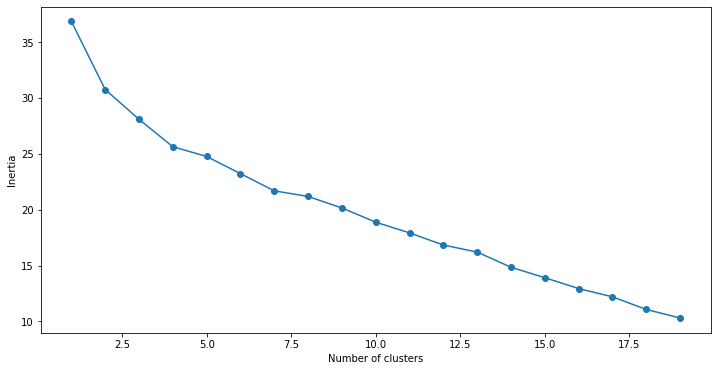

In [327]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [328]:
pred = kmeans.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

1     31
2      7
7      6
6      5
8      3
13     3
18     1
3      1
4      1
5      1
9      1
17     1
10     1
11     1
12     1
14     1
15     1
16     1
0      1
Name: cluster, dtype: int64

In [329]:
frame[0] = list(total_urls)[:len(texts)]

In [330]:
frame.sort_values(by=["cluster"])

0  cluster
57              http://www.pnas.org/content/95/5/2017        0
0   http://www.arabidopsis.org/servlets/Search?act...        1
27  http://www.arabidopsis.org/portals/masc/index.jsp        1
28  http://www.arabidopsis.org/portals/metabolome/...        1
29          http://www.arabidopsis.org/help/index.jsp        1
31  http://www.arabidopsis.org/servlets/Search?act...        1
32  http://www.arabidopsis.org/download/index-auto...        1
66      http://www.arabidopsis.org/download/index.jsp        1
35      http://www.arabidopsis.org/news/newsgroup.jsp        1
38  http://www.arabidopsis.org/servlets/Search?act...        1
39  http://www.arabidopsis.org/servlets/Search?act...        1
45  http://www.arabidopsis.org/portals/genAnnotati...        1
46         http://www.arabidopsis.org/about/index.jsp        1
47  http://www.arabidopsis.org/download/index-auto...        1
49  https://onlinelibrary.wiley.com/doi/pdf/10.100...        1
50  http://www.arabidopsis.org/portals/expression/...        1
51  http://www.arabidopsis.org/servlets/Search?act...        1
52  http://www.arabidopsis.org/tools/bulk/microarr...        1
62  http://www.arabidopsis.org/portals/genAnnotati...        1
63  http://www.arabidopsis.org/servlets/Search?act...        1
25  http://www.arabidopsis.org/portals/nomenclatur...        1
23  http://www.arabidopsis.org/submit/gene_annotat...        1
33       http://www.arabidopsis.org/contact/index.jsp        1
10  http://www.arabidopsis.org/submit/phenotype_su...        1
9   http://www.arabidopsis.org/servlets/processor?...        1
11  http://www.arabidopsis.org/tools/bulk/po/index...        1
12  http://www.arabidopsis.org/servlets/Search?act...        1
6                   http://www.arabidopsis.org#plants        1
17  http://www.arabidopsis.org/servlets/Search?pag...        1
7   http://www.arabidopsis.org/portals/nomenclatur...        1
..                                                ...      ...
5   http://www.arabidopsis.org/portals/genAnnotati...        2
15                  http://abrc.osu.edu/donate-stocks        3
59  http://www.arabidopsis.org/download/index-auto...        4
22  http://www.biologydiscussion.com/genetics/plan...        5
4   http://www.arabidopsis.org/download/index-auto...        6
58  http://www.arabidopsis.org/portals/masc/projec...        6
26  http://www.arabidopsis.org/download/index-auto...        6
3   http://www.arabidopsis.org/download/index-auto...        6
42        http://www.arabidopsis.org/submit/index.jsp        6
54  http://www.arabidopsis.org/submit/marker_submi...        7
60  http://www.arabidopsis.org/browse/genefamily/i...        7
65          http://www.arabidopsis.org/news/index.jsp        7
8        http://www.arabidopsis.org/portals/index.jsp        7
64  http://www.arabidopsis.org/servlets/Search?act...        7
41  https://academic.oup.com/gigascience/article/8...        7
43  http://www.arabidopsis.org/download/index-auto...        8
61         http://www.arabidopsis.org/tools/index.jsp        8
44  http://www.arabidopsis.org/portals/genAnnotati...        8
24        http://www.arabidopsis.org/doc/tools/igb/91        9
13                           http://arabidopsis.info/       10
34  https://en.wikipedia.org/wiki/1000_Plant_Genom...       11
48  http://www.arabidopsis.org/submit/protocol_sub...       12
53  http://www.arabidopsis.org/servlets/Search?act...       13
37  http://www.arabidopsis.org/submit/pathway_subm...       13
2   http://www.arabidopsis.org/submit/genefamily_s...       13
55        http://www.arabidopsis.org/browse/index.jsp       14
56  https://www.nsf.gov/od/lpa/nsf50/nsfoutreach/h...       15
30           http://www.arabidopsis.org/news/jobs.jsp       16
67               http://www.arabidopsis.org/index.jsp       17
21                        http://www.geneontology.org       18

[68 rows x 2 columns]